In [168]:
import re
import math
import copy
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
from scipy.optimize import curve_fit

from __future__ import division

%matplotlib inline

pp = pprint.PrettyPrinter()

## Read in fit results for 10 independent samples of tasks of different types

In [169]:
fact = dict()

In [170]:
factors = defaultdict(list)   # Dict containing al k_factors fitted for a given CPU
for i in range(10):
    input_pattern = 'results_cputype_task_cpu_sub_%s_evgen_0.001.csv'
    f = open(input_pattern % (str(i)))
    for line in f:
        cpu, k = line.strip().split(',')
        k = float(k)
        factors[cpu].append(k)
    f.close()
fact['evgen'] = copy.deepcopy(factors)

In [171]:
factors = defaultdict(list)   # Dict containing al k_factors fitted for a given CPU
for i in range(10):
    input_pattern = 'results_cputype_task_cpu_sub_%s_simul_0.001.csv'
    f = open(input_pattern % (str(i)))
    for line in f:
        cpu, k = line.strip().split(',')
        k = float(k)
        factors[cpu].append(k)
    f.close()
fact['simul'] = copy.deepcopy(factors)

In [172]:
factors = defaultdict(list)   # Dict containing al k_factors fitted for a given CPU
for i in range(10):
    input_pattern = 'results_cputype_task_cpu_sub_%s_pile_0.001.csv'
    f = open(input_pattern % (str(i)))
    for line in f:
        cpu, k = line.strip().split(',')
        k = float(k)
        factors[cpu].append(k)
    f.close()
fact['pile'] = copy.deepcopy(factors)

## Plot averages with error bars of k factors fitted for each CPU

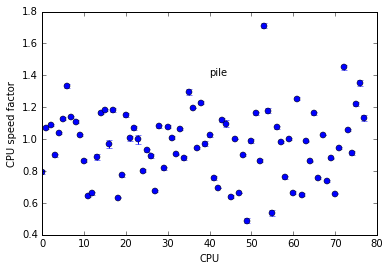

In [173]:
type = 'pile'

k_avg = dict()
k_std = dict()
x = list()
y = list()
yerr = list()
i = 0
for cpu in fact[type].keys():
    k_avg[cpu] = np.mean(fact[type][cpu])
    k_std[cpu] = np.std(fact[type][cpu])
#    print '%s:\t %f +- %f' % (cpu, k_avg[cpu], k_std[cpu])
    x.append(i)
    y.append(k_avg[cpu])
    yerr.append(k_std[cpu])
    i += 1
plt.figure()
plt.errorbar(x, y, yerr=yerr, fmt='o')
plt.xlabel('CPU')
plt.ylabel('CPU speed factor')
plt.text(40., 1.4, type)

## Load HS06 values taken from HEPSPEC web site

In [133]:
df2 = pd.read_csv('HS06_ref.txt', names=['cpu', 'hs06', 'cores'])

In [174]:
hs = dict()
factors = fact[type]
for row in df2.itertuples():
    cpu = row[1]
    a = row[2] / row[3]
    for cpu2 in factors.keys():
        if cpu in cpu2:
            hs[cpu2] = a

In [183]:
df = DataFrame({'k_avg': k_avg, 'k_std': k_std, 'hs': hs}).sort_values(by='k_avg', inplace=False)

## Plot factors for CPUs with HS06 data, no correction

(0.0, 2.0)

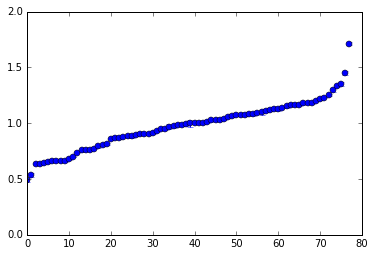

In [190]:
x = range(len(df))
y = df.k_avg
y_err = df.k_std
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.ylim([0., 2.])

## Plot factors for CPUs with HS06 data, with correction

(0.0, 2.0)

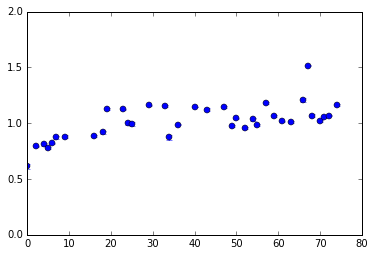

In [191]:
x = range(len(df))
y = df.k_avg / df.hs * 10.
y_err = df.k_std / df.hs * 10.
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.ylim([0., 2.])

## Plot correlation between CPU speed factors and HS06/core

(0.0, 1.5)

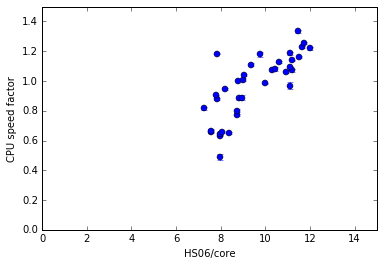

In [192]:
x = df.hs
y = df.k_avg
y_err = df.k_std
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.xlabel('HS06/core')
plt.ylabel('CPU speed factor')
plt.xlim([0., 15.])
plt.ylim([0., 1.5])

## Plot correlation between factors for evgen and simul

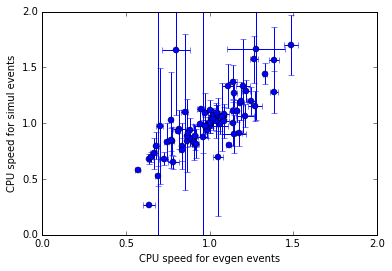

In [193]:
type1 = 'evgen'
type2 = 'simul'
fact1 = fact[type1]
fact2 = fact[type2]
#print fact2['Intel(R) Xeon(R) CPU E5-2640 v2 @ 2.00GHz 4096 KB']
x = list()
y = list()
x_err = list()
y_err = list()
s1 = set(fact1.keys())
s2 = set(fact2.keys())
s = s2.intersection(s1)
for cpu in s:
    k1_avg = np.mean(fact1[cpu])
    k1_std = np.std(fact1[cpu])
    k2_avg = np.mean(fact2[cpu])
    k2_std = np.std(fact2[cpu])
    x.append(k1_avg)
    x_err.append(k1_std)
    y.append(k2_avg)
    y_err.append(k2_std)
plt.xlim([0., 2.])
plt.ylim([0., 2.])
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o')
plt.xlabel('CPU speed for %s events' % type1)
plt.ylabel('CPU speed for %s events' % type2)

## Fit to a straight line

In [194]:
def f(x, a, b):
    return a * x + b

res = curve_fit(f, x, y)

print "The slope of the linear fit is %f +- %f" % (res[0][0], np.sqrt(res[1][0][0]))
print "The intercept of the linear fit is %f +- %f" % (res[0][1], np.sqrt(res[1][1][1]))

The slope of the linear fit is 0.528600 +- 0.319114
The intercept of the linear fit is 0.560407 +- 0.320603
